### Hypothesis Testing

#### The Null and Alternative Hypothesis
The first thing we need to introduce is the null hypothesis, commonly written as **$H_0$** . The null hypothesis is the default case, generally reflecting the current common conception of the world. The alternative hypothesis is the one you are testingz


#### Examples
The alternative hypothesis $H_A$ is that you own more than 10 pairs of shoes. The null hypothesis $H_0$ is that you do not own more than 10 pairs of shoes.

The alternative hypothesis $H_A$ is that eating pizza is related with obesity. The null hypothesis $H_0$ is that it is not.

The alternative hypothesis $H_A$ is that microsoft's mean returns > 0. The null hypothesis $H_0$ is that they <= 0.

#### Difficulty of Testing
Some hypotheses are easier to test than others. For instance the alternative hypothesis, "I own more than 10 pairs of shoes." and the accompanying null hypothesis that you do not, is easily tested by counting the number of pairs you own. However, you will still not get a perfect answer all the time in this case, as there may be measurement error in the counting, albiet quite small.

On the other hand, the hypothesis, "The number of insect species is greater than the number of stars in the universe." would be more difficult to test and require lots of data gathering.

#### Hypotheses Must be Testable
A hypothesis cannot be vague, otherwise how will it be tested. For example, "Momentum trading is a good way to make money." is not really testable. What does 'good' mean? What type of momentum trading are we discussing? Hypotheses should be very specific and the type of test needed should follow quickly from the hypothesis.

#### How to Perform Hypothesis Testing
The following are the main steps in hypothesis testing:

State the hypothesis and the alternative to the hypothesis
Identify the appropriate test statistic and its distribution. Ensure that any assumptions about the data are met (stationarity, normality, etc.)
Specify the significance level, $\alpha$
From $\alpha$ and the distribution compute the 'critical value'.
Collect the data and calculate the test statistic
Compare test statistic with critical value and decide whether to accept or reject the hypothesis.
First we state the hypothesis that we wish to test. We do this by identifying a null hypothesis and an alternative hypothesis. The null hypothesis, $H_0$, is the one that we want to test, while the alternative hypothesis, $H_A$, is the hypothesis that is accepted in the case where $H_0$ is rejected.

Let's say that we want to test whether the mean return of Microsoft stock is positive. The parameter that we are testing is denoted by $\theta$ and the proposed value of the parameter is denoted by $\theta_0$, which in this case is equal to $0$. So we say that our $H_0$ is $\theta = \theta_0$, that the returns are negative, and our $H_A$ is $\theta \neq \theta_0$. Including this formation, there are three possible ways to formulate null and alternative hypotheses:

$H_0: \theta = \theta_0$ versus $H_A: \theta \neq \theta_0$ (A "not equal to" alternative hypothesis)
$H_0: \theta \leq \theta_0$ versus $H_A: \theta > \theta_0$ (A "greater than" alternative hypothesis)
$H_0: \theta \geq \theta_0$ versus $H_A: \theta < \theta_0$ (A "less than" alternative hypothesis)

In this case, where we are testing the returns of MSFT, $\theta = \mu_{MSFT}$, representing the stock's mean returns. Since we are testing whether the returns are positive or negative, we have that $\theta_0 = 0$. Our example follows the first formulation of a hypothesis test. This is a two-sided hypothesis test (or two-tailed hypothesis test). The second and third formulations are examples of a one-sided hypothesis test (or one-tailed hypothesis test). With a one-sided test, we reject the null in favor of the alternative only if the data indivates that $\theta$ is repectively greater than or less than $\theta_0$. A two-sided test rejects the null in favor of the alternative if the data indicates that $\theta$ is either greater or less than $\theta_0$.

So if we were to write out our hypothesis for MSFT in more qualitative terms, we would have:

\begin{eqnarray} H_0 &:& \text{The mean return on Microsoft stock is $0$}\\ H_A &:& \text{The mean return on Microsoft stock is not $0$} \end{eqnarray}
When forming a hypothesis test, the null and alternative hypothesis must be complementary to each other. Between them they must cover all values of $\theta$. Regardless of the type of hypothesis test we are performing, we always test the null hypothesis as if $\theta = \theta_0$. In the case of either of the one-tailed tests, this will still provide more than enough evidence for us to make a decision. For example, if $H_0: \theta \leq 0$, $H_A: \theta > 0$, and we have enough evidence to reject $H_0: \theta = 0$ in favor of $H_A: \theta > 0$, then this holds true for all values less than $0$ as well.

The most common type of hypothesis test is the two-tailed, "not equal to", hypothesis test, because it presents a neutral view. The one-tailed hypothesis tests are less neutral than the "not equal to" test, reflecting the thoughts of the tester. One-tailed tests are often used to test "hoped for" results or results that the testers have a prior idea about.

In [78]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### One Population Proportion
##### Research Question
In previous years, 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media?

**Population**: Parents with a teenager (age 13-18)
**Parameter of Interest**: p

**Null Hypothesis**: p = 0.52
**Alternative Hypthosis**: p > 0.52 (note that this is a one-sided test)

**Data**: 1018 people were surveyed. 56% of those who were surveyed believe that their teenager’s lack of sleep is caused due to electronics and social media.

Use of **proportions_ztest()** from **statsmodels**
Note the argument **alternative="larger"** indicating a one-sided test. The function returns two values - the z-statistic and the corresponding p-value.

In [79]:
n = 1018
pnull = .52
phat = .56

In [80]:
sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

(2.571067795759113, 0.005069273865860533)

##### Conclusion of the hypothesis test
Since the calculated p-value of the z-test is pretty small, we can reject the Null hypothesis that the percentage of parents, who believe that their teenager’s lack of sleep is caused due to electronics and social media, is as same as previous years' estimate i.e. 52%.

Although, we do not accept the alternate hypothesis, this informally means that there is a good chance of this proportion being more than 52%.

#### Difference in Population Proportions
##### Research Question
Is there a significant difference between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?

**Populations**: All parents of black children age 6-18 and all parents of Hispanic children age 6-18
**Parameter of Interest**: p1 - p2, where p1 = black and p2 = hispanic

**Null Hypothesis**: p1 - p2 = 0
**Alternative Hypthosis**: p1 - p2  ≠  = 0

**Data**: 247 Parents of Black Children. 36.8% of parents report that their child has had some swimming lessons.
308 Parents of Hispanic Children. 38.9% of parents report that their child has had some swimming lessons.

##### Use of ttest_ind() from statsmodels
Difference in population proportion needs t-test. Also, the population follow a binomial distribution here. We can just pass on the two population quantities with the appropriate binomial distribution parameters to the t-test function.

The function returns three values: (a) test statisic, (b) p-value of the t-test, and (c) degrees of freedom used in the t-test.

In [81]:
n1 = 247
p1 = .37

n2 = 308
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

In [82]:
sm.stats.ttest_ind(population1, population2)


(0.3494274931671974, 0.7269014173757042, 553.0)

##### Conclusion of the hypothesis test
Since the p-value is quite high ~0.768, we cannot reject the Null hypothesis in this case i.e. the difference in the population proportions are not statistically significant.

##### But what happens if we could survey much higher number of people?
We do not change the proportions, just the number of survey participants in the two population. The slight difference in the proportion could become statistically significant in this situation. There is no guarantee that when you run the code, you will get a p-value < 0.05 all the time as the samples are randomly generated each itme. But if you run it a few times, you will notice some p-values < 0.05 for sure.

In [83]:
n1 = 5000
p1 = .37

n2 = 5000
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

In [84]:
sm.stats.ttest_ind(population1, population2)


(-2.250287646467903, 0.024452339465366856, 9998.0)

#### One Population Mean
##### Research Question
Let's say a cartwheeling competition was organized for some adults. The data looks like following,

(80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01)

Is distance Is the average cartwheel distance (in inches) for adults more than 80 inches?

**Population**: All adults
**Parameter of Interest**:  μ , population mean cartwheel distance.

**Null Hypothesis**:  μ  = 80
**Alternative Hypthosis**:  μ  > 80

**Data**:
25 adult participants.
μ=83.84 
σ=10.72

In [85]:
cwdata = np.array([80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 
                 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01])

In [86]:
n = len(cwdata)
mean = cwdata.mean()
sd = cwdata.std()
(n, mean, sd)

(25, 83.84320000000001, 10.716018932420752)

In [87]:
sm.stats.ztest(cwdata, value = 80, alternative = "larger")


(1.756973189172546, 0.039461189601168366)

##### Conclusion of the hypothesis test
Since the p-value (0.0394) is lower than the standard confidence level 0.05, we can reject the Null hypothesis that the mean cartwheel distance for adults (a population quantity) is equal to 80 inches. There is strong evidence in support for the alternatine hypothesis that the mean cartwheel distance is, in fact, higher than 80 inches. Note, we used **alternative="larger"** in the z-test.

We can also plot the histogram of the data to check if it approximately follows a Normal distribution.

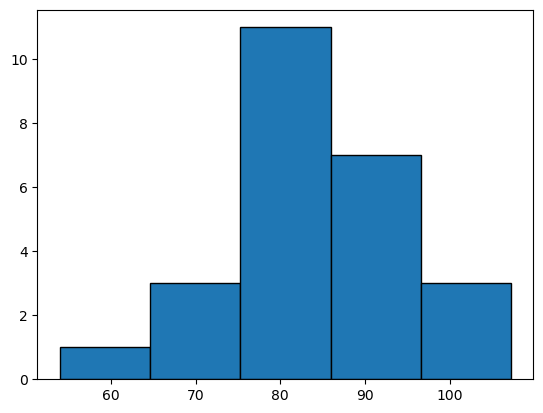

In [88]:
plt.hist(cwdata,bins=5,edgecolor='k')
plt.show()

#### Difference in Population Means
##### Research Question
Considering adults in the NHANES data, do males have a significantly higher mean Body Mass Index than females?

**Population**: Adults in the NHANES data.
**Parameter of Interest**:  μ1−μ2 , Body Mass Index.

**Null Hypothesis**:  μ1=μ2 
**Alternative Hypthosis**:  μ1≠μ2 
**Data**:

2976 Females  μ1=29.94 
σ1=7.75 
2759 Male Adults
μ2=28.78 
σ2=6.25 
μ1−μ2=1.16

**Question 1**: Read only head of nhanes_2015_2016.csv file

In [142]:
df = pd.read_csv("nhanes_2015_2016.csv")
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


**Question 2**: Create female and male dataframe using the condition that RIAGENDR == 2 are females and RIAGENDR == 1 are males

In [153]:
female = df[df["RIAGENDR"] == 2]
male = df[df["RIAGENDR"] == 1]

**Question 3**: Fill missing parts

In [154]:
lengthF = len(female) # length of female dataframe
meanF = female["BMXBMI"].mean()
standard_deviationF = female["BMXBMI"].std() #standard deviation of BMXBMI column in female dataframe

(lengthF, meanF, standard_deviationF)

(2976, 29.939945652173996, 7.75331880954568)

In [155]:
lengthM = len(male) #length of males dataframe
meanM = male["BMXBMI"].mean() #mean of BMXBMI column in male dataframe
standard_deviationM = male["BMXBMI"].std() #standard deviation of BMXBMI column in male dataframe

(lengthM, meanM, standard_deviationM)

(2759, 28.778072111846985, 6.252567616801485)

In [156]:
sm.stats.ztest(female["BMXBMI"].dropna(), male["BMXBMI"].dropna(),alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

**Question 4** Which of the hypothesis we should reject and why?

In [ ]:
#We can reject the null hypothesis because the p value is less than the significance value.

##### Conclusion of the hypothesis test

We can also plot the histogram of the data to check if it approximately follows a Normal distribution

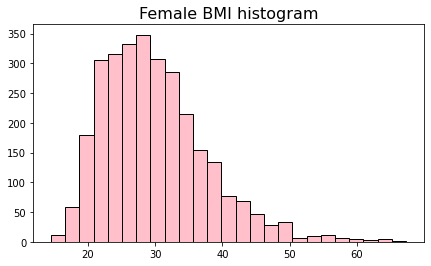

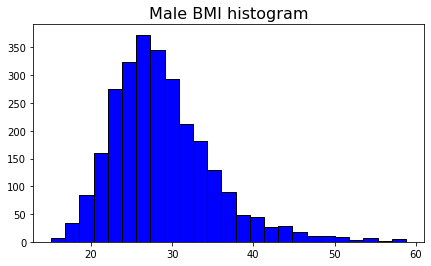

In [19]:
plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(female["BMXBMI"].dropna(),edgecolor='k',color='pink',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(male["BMXBMI"].dropna(),edgecolor='k',color='blue',bins=25)
plt.show()